In [1]:
# импорт общих библиотек
import pandas as pd # for work with datasets
import numpy as np # for work with array
import os, time, psutil, math # special for work with dir
import shutil # for copy files from dir
import matplotlib.pyplot as plt
from matplotlib import image

%matplotlib inline

In [2]:
from keras.src.applications.xception import decode_predictions
from keras.applications import vgg19 # VGG19
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing import image as image_k # image preprocessing
import pickle # for work with pickles format
from sklearn.preprocessing import StandardScaler
from keras.models import model_from_json
from keras import regularizers, optimizers

In [3]:
model = vgg19.VGG19(weights ='imagenet')

574710816/574710816 [==============================] - 30s 0us/step


In [4]:
# сохранение локального файла модели VGG19
# локальное сохранение
model_json = model.to_json()
with open('vgg19.json', 'w') as json_file:
  json_file.write(model_json)

# сохраняем веса в .h5
model.save_weights("vgg19.h5")
print("модель сохранена")

модель сохранена


In [51]:
# загрузка данных, зоздание массива данных
# директория с файлами
directory = '/content/sample_data/0016E5_07963.png'

In [52]:
# количество файлов
n_max = 4
# размерность картинки, которая подается в нейронную сеть
n_size = 224

In [56]:
# создаем пустой массив с нулями
x_all = np.zeros((n_max, n_size, n_size, 3), dtype = 'int16')
print = ('создан массив')

for n in range(1, n_max, + 1):
  numi = str(n)
  while len(numi) != 6:
    numi = '0' + numi

  # заполняем массив
  b = np.expand_dims(image_k.img_to_array(image_k.load_img(directory + numi + '.jpg',
                                                           target_size = (n_size, n_size))), axis = 0).reshape([n_size, n_size, 3])
  x_all[n-1] = b

  print('Количество картинок загружено =', len(x_all), '\n',
        'Размерность картинки =', x_all[0].shape)

FileNotFoundError: ignored

In [47]:
# обращение к модели
json_file = open('/content/vgg19.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# подгружаем веса
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('/content/vgg19.h5')

print('модель загружена')

TypeError: ignored

In [58]:
# предобработка данных
x_all_preprocessed = [] # для обработки изображения
for i in x_all:
  i = i.reshape([-1, 224,224, 3])
  x_all_preprocessed.append(i)

In [60]:
# подача данных в массив
prediction_list =[]

# распознование
for i in range(0, len(x_all_preprocessed)):
  # делаем прогноз
  predictions = loaded_model.predict(x_all_preprocessed[i].reshape([-1, 224,224, 3]))
  prediction_list.append(predictions)

1/1 [==============================] - 1s 715ms/step


In [61]:
# первый прогноз
prediction_list[1]

array([[1.15051014e-04, 1.64089759e-03, 3.99862533e-04, 9.09760070e-04,
        1.37604994e-03, 9.41175444e-04, 4.38394910e-03, 1.50824097e-04,
        1.47030863e-04, 1.82841482e-04, 7.22410739e-04, 3.41647275e-04,
        6.37492747e-04, 1.08726765e-03, 4.40791337e-04, 4.57658578e-04,
        1.01061852e-03, 4.23671881e-04, 6.93382055e-04, 1.12008769e-03,
        1.23415713e-03, 7.50366016e-04, 6.09769020e-04, 4.81565366e-04,
        1.54054636e-04, 2.04273922e-04, 9.50409332e-04, 8.81351414e-04,
        1.90813502e-04, 4.20099078e-03, 4.65411023e-04, 5.39201894e-04,
        4.47946513e-04, 1.11116283e-03, 7.51423300e-04, 4.90743842e-04,
        1.34098856e-03, 4.65466728e-04, 1.91074959e-03, 4.29755193e-04,
        1.31568557e-03, 6.76506781e-04, 1.25015120e-03, 7.69019884e-04,
        9.77075077e-04, 1.77977188e-03, 1.44437444e-03, 8.20197864e-04,
        5.52320213e-04, 6.18643011e-04, 8.44700960e-04, 3.21810541e-04,
        2.11827550e-03, 2.63929903e-03, 1.04481785e-03, 4.452524

In [62]:
# преобразование результата в исходный формат
labels_decoded = [] # для предиктов
for i in range(0, len(x_all_preprocessed)):
  # создаем метки
  label = decode_predictions(prediction_list[i], top = 5)[0]
  labels_decoded.append([(t[1], t[2].item()) for t in label])

35363/35363 [==============================] - 0s 0us/step


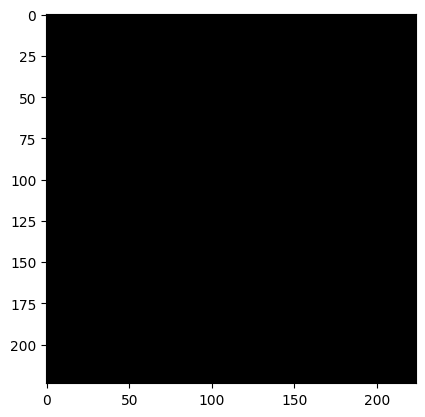

TypeError: ignored

In [63]:
# вывод результата на печать
for i in range(0, len(x_all_preprocessed)):
  # рисуем изображения и топ 5 совпадений
  plt.imshow(np.uint8(x_all[i]))
  plt.show()
  print('вероятность принадлежности:', "\n", labels_decoded[i]) # вывод вероятностей